In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import scipy.integrate as integrate
import mpmath as mp

In [3]:
def C(T,J=1):
    b = 1/T #beta
    k = 2*np.sinh(2*b*J)/(np.cosh(2*b*J)**2)   #kappa
    K1, _ = integrate.quad(lambda x: 1/np.sqrt(1-k**2*np.sin(x)**2),0,np.pi/2)
    E1, _ = integrate.quad(lambda x: np.sqrt(1-k**2*np.sin(x)**2),0,np.pi/2)
    tanh = np.tanh(2*b*J)
    return 4/np.pi*((b*J/tanh)**2)*(K1-E1-(1-tanh**2)*(np.pi/2+(2*tanh**2-1)*K1)) # boltzman k = 1

def C2(T,J=1):
    b = 1/T
    Tc = 2/np.log(1+np.sqrt(2))
    return -2/np.pi*(2*J*b)**2*np.log(np.abs(1-T/Tc))   

def C3(T,J=1):
    b = 1/T #beta
    k = 2*np.sinh(2*b*J)/(np.cosh(2*b*J)**2)   #kappa
    mp.mp.dps = 50
    K1 = mp.quad(lambda x: 1/mp.sqrt(1-k**2*mp.sin(x)**2),[0,mp.pi/2])
    E1 = mp.quad(lambda x: mp.sqrt(1-k**2*mp.sin(x)**2),[0,mp.pi/2])
    tanh = np.tanh(2*b*J)
    return 4/np.pi*((b*J/tanh)**2)*(K1-E1-(1-tanh**2)*(np.pi/2+(2*tanh**2-1)*K1)) # boltzman k = 1

_Ebin = 100
ExactT = np.zeros(_Ebin)
Exactm = np.zeros_like(ExactT)

Critical_Temp = 2/np.log(1+np.sqrt(2))

for i in range(len(Exactm)):
    ExactT[i] = (Critical_Temp-0.01)/_Ebin*(i+1)
    Exactm[i] = (1-np.sinh(2*(1/ExactT[i]))**-4)**(1/8)

ExactT = np.append(ExactT,Critical_Temp)
Exactm = np.append(Exactm,0)

_Ebin2 = 200
ExactT2 = np.zeros(_Ebin2)
ExactC = np.zeros_like(ExactT2)

for i in range(len(ExactC)):
    ExactT2[i] = 5/_Ebin2*(i+1)
    ExactC[i] = C(ExactT2[i]) 


In [4]:
def draw_fig1(path):
    a = pd.read_csv(path)
    T2 = a.iloc[:,1].values
    M2 = a.iloc[:,2].values
    C2 = a.iloc[:,3].values
    M2error = np.sqrt(1/(18000-1)*abs(a.iloc[:,5].values/10000-(a.iloc[:,4].values/100)**2))

    plt.style.use('seaborn-whitegrid')
    plt.figure(dpi=300)


    plt.ylim(-0.1,2)
    plt.xlim(0,T2[-1])
    # plt.errorbar(T2,M2,yerr=M2error, lw=1, linestyle='', marker='s', markersize=5,capsize=7, color='b', label='magnetization',mfc='none')
    plt.plot(T2,M2, lw=1, linestyle='', marker='s', markersize=5, color='b', label='magnetization',mfc='none')
    plt.plot(T2,C2,linestyle='', marker='o', markersize=5, color='orange', label='specific heat',mfc='none')
    # plt.errorbar(T2,C2,yerr=C2error,linestyle='', marker='o', markersize=5,capsize=7, color='orange' ,label='specific heat',mfc='none')


    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.legend()
    # plt.text(0.05,1.91,"100 $\\times$ 100 lattice")
    # plt.text(0.05,1.79,"15000 steps per site")
    # plt.text(0.05,1.67,"Jackknife bin : 50")
    # plt.text(2.27, -0.2, '$T_c$', ha='center')


    plt.ylabel('Specific heat or magnetization per spin m')
    plt.xlabel('Temperature T')
    plt.show()

In [5]:
def draw_multi(path_list,Lsize,Step_Size):
    plt.style.use('seaborn-whitegrid')
    plt.figure(dpi=300)

    for i in range(len(path_list)):
        a = pd.read_csv(ls[i])
        T2 = a.iloc[:,1].values
        M2 = a.iloc[:,2].values
        C2 = a.iloc[:,3].values
        M2error = np.sqrt(1/(Step_Size[i]-1)*abs(a.iloc[:,5].values-(a.iloc[:,4].values)**2))
        # plt.ylim(-0.1,2)
        # plt.xlim(0,T2[-1])
        # plt.errorbar(T2,M2,yerr=M2error, lw=1, linestyle='', marker='s', markersize=5,capsize=7, color='b', label='magnetization',mfc='none')
        plt.errorbar(T2,M2,M2error,lw=1, linestyle='', marker='s', markersize=5, label='magnetization'+str(Lsize[i]),mfc='none')
        plt.plot(T2,C2,linestyle='', marker='o', markersize=5, label='specific heat'+str(Lsize[i]),mfc='none')
        # plt.errorbar(T2,C2,yerr=C2error,linestyle='', marker='o', markersize=5,capsize=7, color='orange' ,label='specific heat',mfc='none')
    
    plt.legend()    
    plt.ylim(-0.1,3)
    # plt.xlim(T2[0],T2[-1])

    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    # plt.text(0.05,1.91,"100 $\\times$ 100 lattice")
    # plt.text(0.05,1.79,"15000 steps per site")
    # plt.text(0.05,1.67,"Jackknife bin : 50")
    # plt.text(2.27, -0.2, '$T_c$', ha='center')


    plt.ylabel('Specific heat or magnetization per spin m')
    plt.xlabel('Temperature T')
    plt.show()

def draw_multi_with_exact(path_list,Lsize):
    plt.style.use('seaborn-whitegrid')
    plt.figure(dpi=300)

    for i in range(len(path_list)):
        a = pd.read_csv(ls[i])
        T2 = a.iloc[:,1].values
        M2 = a.iloc[:,2].values
        C2 = a.iloc[:,3].values
        M2error = np.sqrt(1/(18000-1)*abs(a.iloc[:,5].values/10000-(a.iloc[:,4].values/100)**2))

        # plt.ylim(-0.1,2)
        # plt.xlim(0,T2[-1])
        # plt.errorbar(T2,M2,yerr=M2error, lw=1, linestyle='', marker='s', markersize=5,capsize=7, color='b', label='magnetization',mfc='none')
        plt.plot(T2,M2, lw=1, linestyle='', marker='s', markersize=5, label='magnetization'+str(Lsize[i]),mfc='none')
        plt.plot(T2,C2,linestyle='', marker='o', markersize=5, label='specific heat'+str(Lsize[i]),mfc='none')
        # plt.errorbar(T2,C2,yerr=C2error,linestyle='', marker='o', markersize=5,capsize=7, color='orange' ,label='specific heat',mfc='none')
    
    plt.legend()
    plt.plot(ExactT,Exactm, color='b')
    plt.plot(ExactT2,ExactC, color='orange')    
    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    # plt.text(0.05,1.91,"100 $\\times$ 100 lattice")
    # plt.text(0.05,1.79,"15000 steps per site")
    # plt.text(0.05,1.67,"Jackknife bin : 50")
    # plt.text(2.27, -0.2, '$T_c$', ha='center')


    plt.ylabel('Specific heat or magnetization per spin m')
    plt.xlabel('Temperature T')
    plt.show()

In [6]:
Lname = ["L24","L32","L48","L64","L96"]
Lsize = [24,32,48,64,96]

def draw_binder(path_list,Lsize,Step_Size,xliml = (1.5,4),yliml = (0.75,1)):
    Llist = []
    for path in path_list:
        Llist.append(pd.read_csv(path))
    marker = ["o","s","v","^","8"]
    T2 = Llist[0].iloc[:,1].values
    Binder = [0.5*(3-i.iloc[:,6].values/(i.iloc[:,5].values)**2) for i in Llist]

    plt.style.use('seaborn-whitegrid')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ylim(yliml)
    plt.xlim(xliml)
    for i in range(len(path_list)):
        plt.plot(T2,Binder[i],marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

    plt.legend()
    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.ylabel('Binder ratio g')
    plt.xlabel('Temperature T')
    # plt.text(2.265,0.748, '$T_c$')
    plt.show()

    # fig = plt.figure()
    # ax = fig.add_subplot(111)
    # # plt.ylim(0.75,1)
    # # plt.xlim(-2,2)
    # T22 = T2-2/np.log(1+np.sqrt(2))
    # for i in range(Llen):
    #     plt.plot(T22*Lsize[i],Binder[i],linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    # ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    # plt.legend()
    # plt.axvline(x=0,c='grey',lw=1,dashes=[2,2])
    # plt.ylabel('Binder ratio g')
    # plt.xlabel('Finite size scailing')
    # # plt.xlabel('$L^{1/\nu}[T-T_c]$')
    # plt.show()

In [7]:
def draw_binder_FFS(path_list,Lsize,xliml = (1.5,4),yliml = (0.75,1),Tc=2.269,nu=1):
    Llist = []
    for path in path_list:
        Llist.append(pd.read_csv(path))
    marker = ["o","s","v","^","8"]
    T2 = Llist[0].iloc[:,1].values
    Binder = [0.5*(3-i.iloc[:,6].values/(i.iloc[:,5].values)**2) for i in Llist]

    plt.style.use('seaborn-whitegrid')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ylim(yliml)
    plt.xlim(xliml)
    for i in range(len(path_list)):
        plt.plot(T2,Binder[i],marker=marker[i],markersize=5,mfc='none',label="L"+str(Lsize[i]))
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

    plt.legend()
    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.ylabel('Binder ratio g')
    plt.xlabel('Temperature T')
    # plt.text(2.265,0.748, '$T_c$')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ylim(0.75,1)
    plt.xlim(-2,2)
    T22 = T2-Tc
    for i in range(len(path_list)):
        plt.plot(T22*(Lsize[i]**(1/nu)),Binder[i],linestyle="",marker=marker[i],markersize=5,mfc='none',label="L"+str(Lsize[i]))
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.legend()
    plt.axvline(x=0,c='grey',lw=1,dashes=[2,2])
    plt.ylabel('Binder ratio g')
    plt.xlabel('Finite size scailing')
    # plt.xlabel('$L^{1/\nu}[T-T_c]$')
    plt.show()

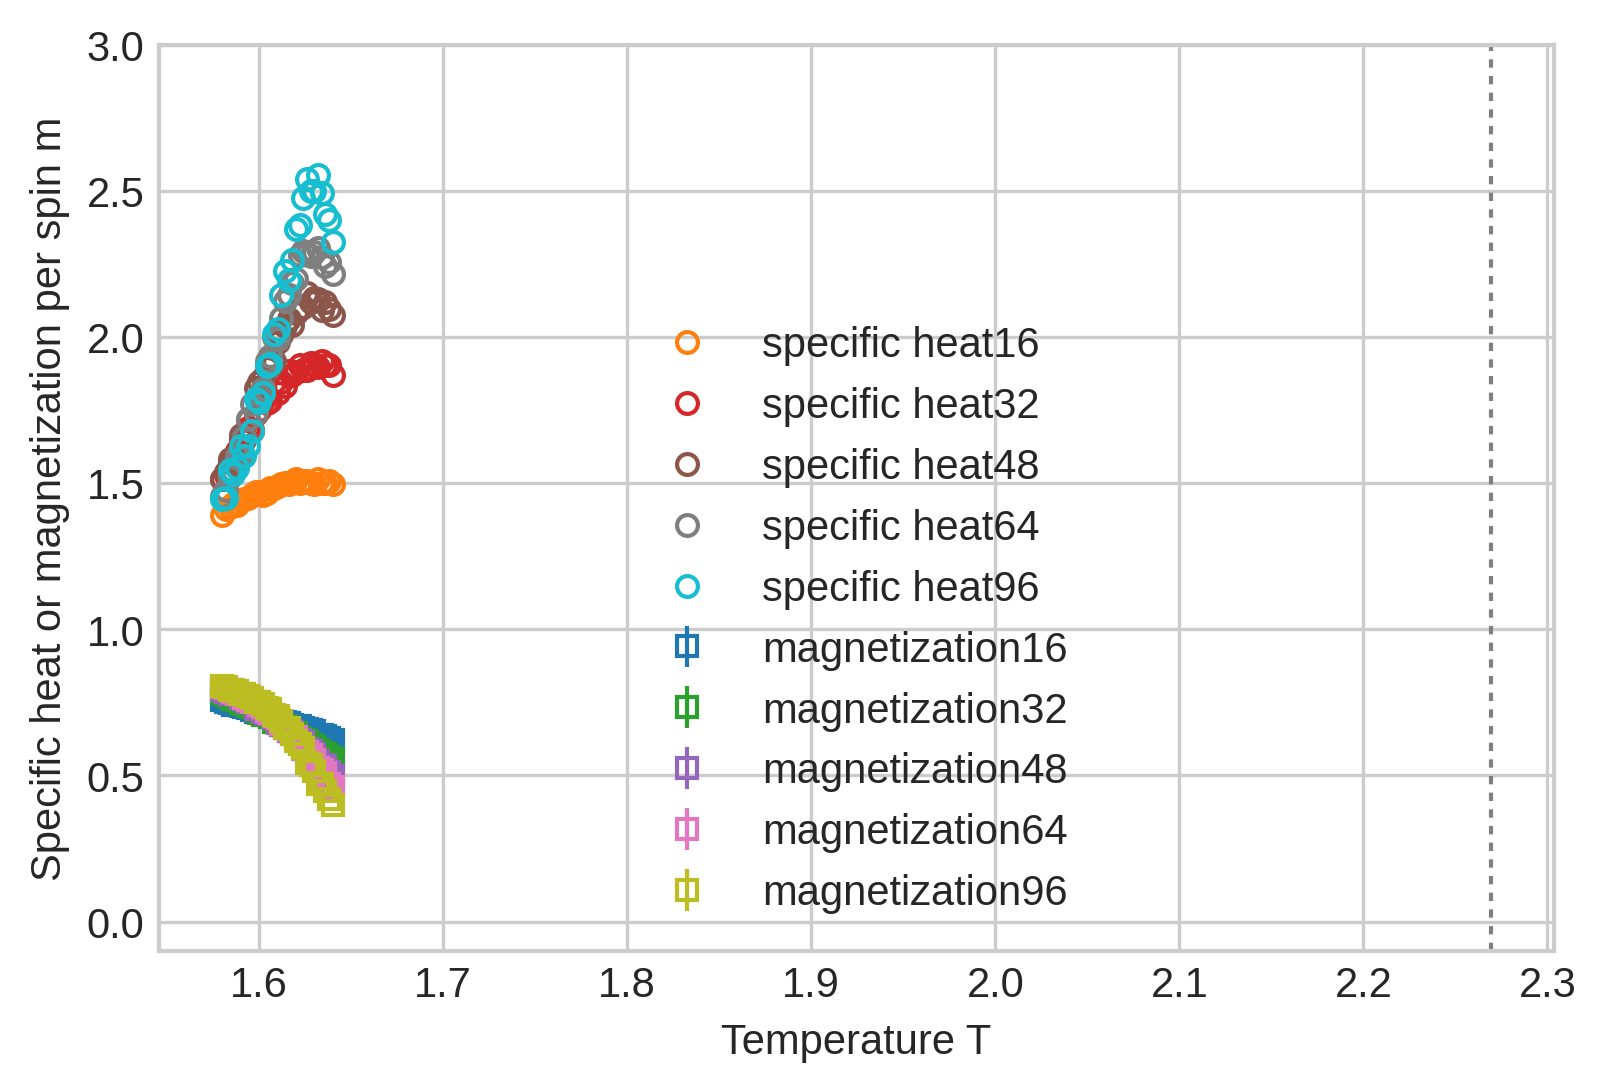

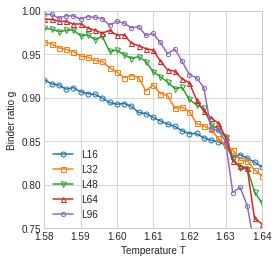

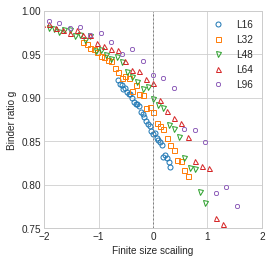

In [9]:
Lsize = [16,32,48,64,96]
mcsl = [3000000,3000000,3000000,4000000,4000000]
alpha = "1.000000"
alpha2 = 1
ls = []
for i, mcs in zip(Lsize, mcsl):
    ls.append("./0711/a="+str(alpha2)+"/AA_Metropolis_c_"+str(i)+"_"+str(i)+"_int31_mcs"+str(mcs)+"_a"+alpha+"_Test__1.csv")

draw_multi(ls,Lsize,mcsl)
# draw_binder(ls,Lsize,(1.8,2.23),(0.75,1))
draw_binder_FFS(ls,Lsize,(1.58,1.64),(0.75,1),1.62,1)

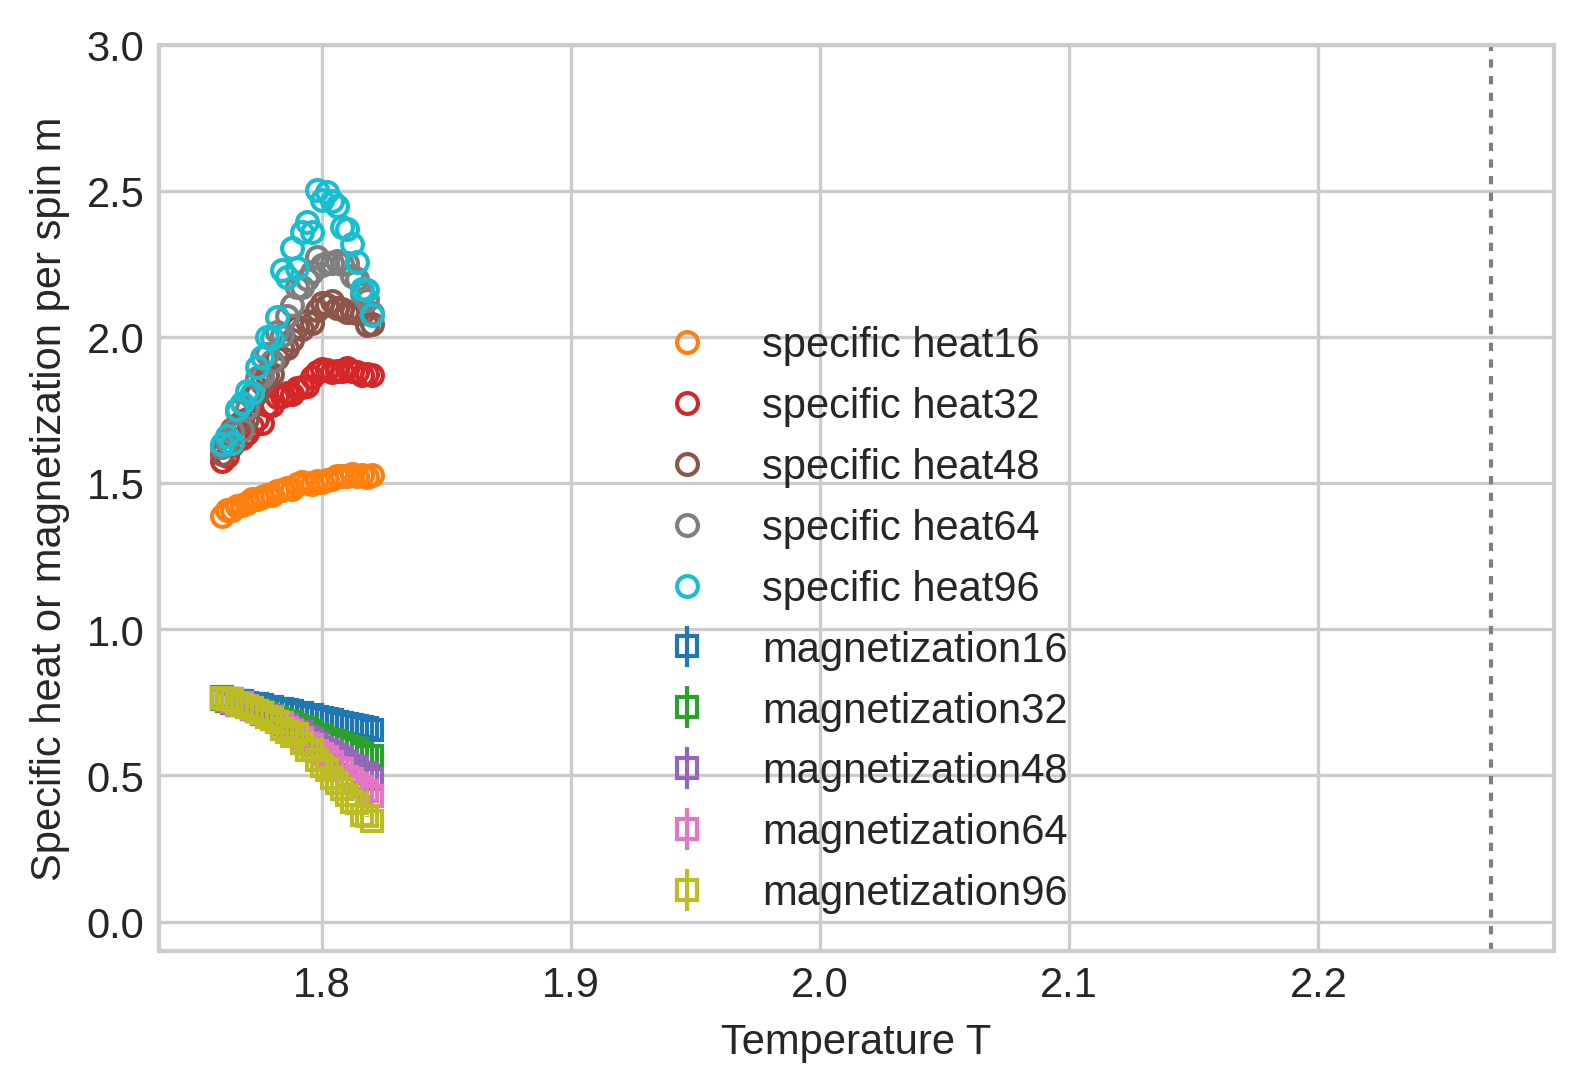

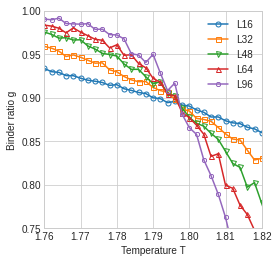

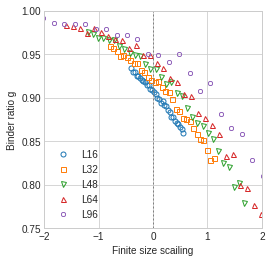

In [10]:
alpha = "1.500000"
alpha2 = 1.5
ls = []
for i, mcs in zip(Lsize, mcsl):
    ls.append("./0711/a="+str(alpha2)+"/AA_Metropolis_c_"+str(i)+"_"+str(i)+"_int31_mcs"+str(mcs)+"_a"+alpha+"_Test__1.csv")

draw_multi(ls,Lsize,mcsl)
# draw_binder(ls,Lsize,(1.8,2.23),(0.75,1))
draw_binder_FFS(ls,Lsize,(1.76,1.82),(0.75,1),1.785,1)

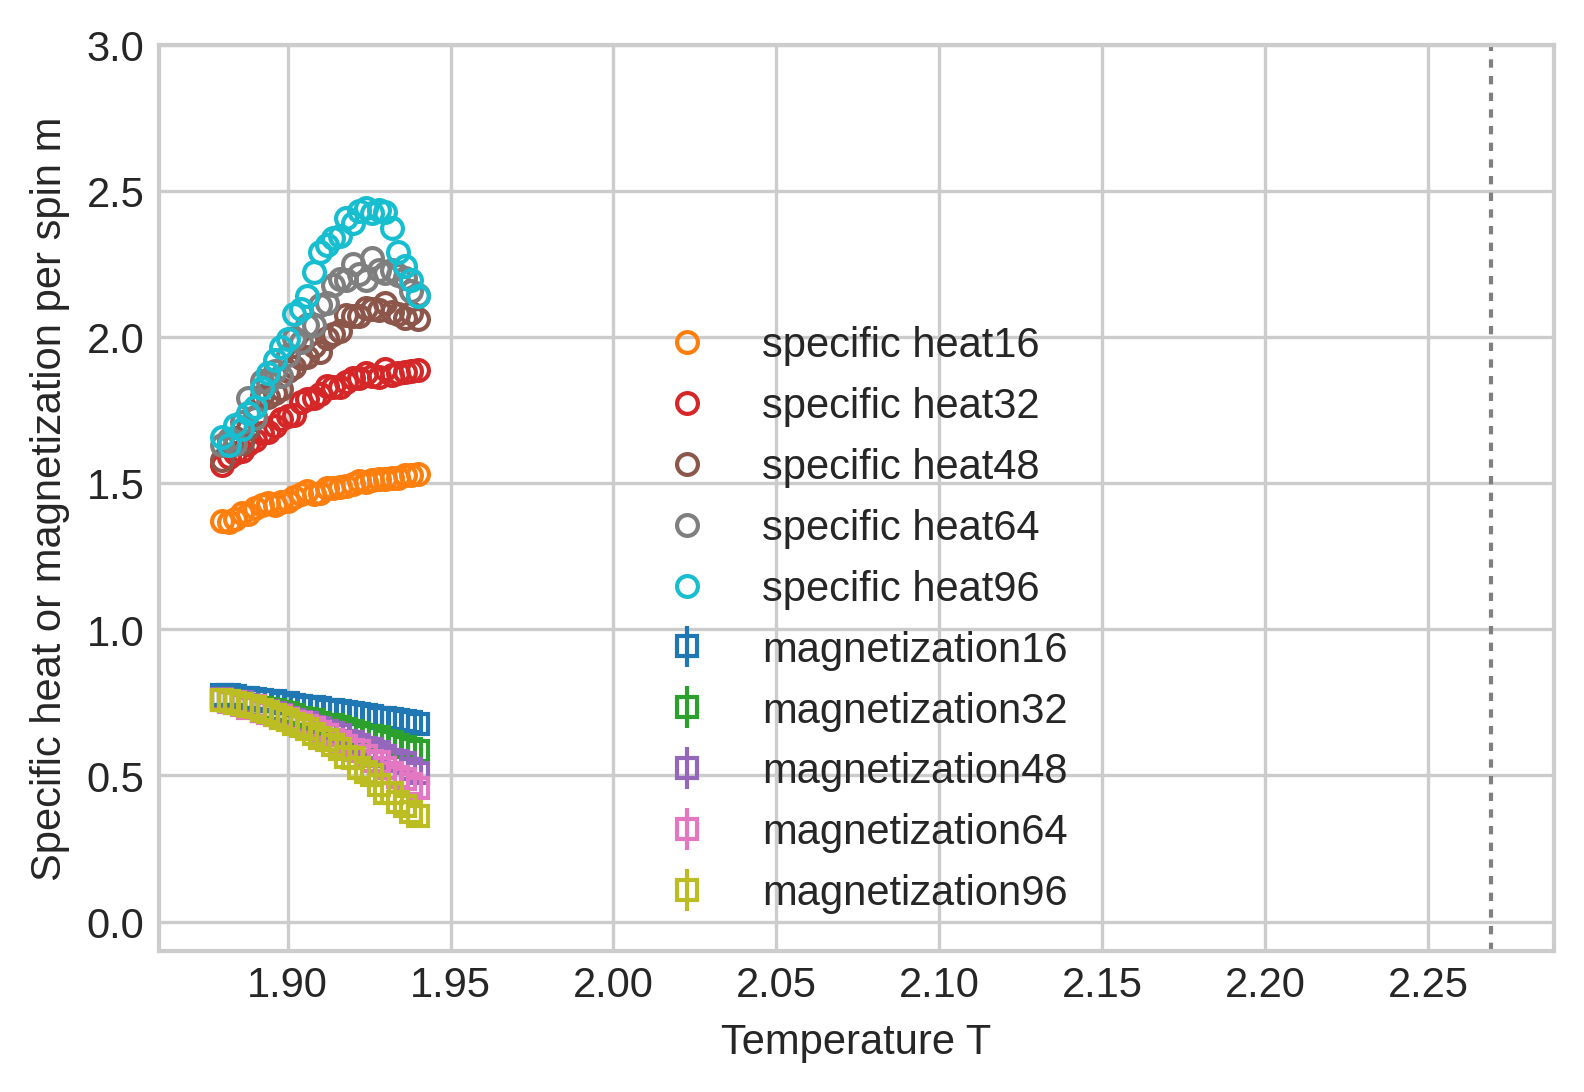

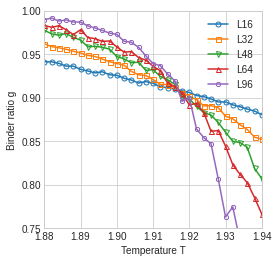

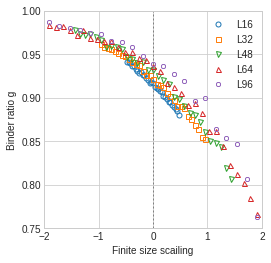

In [11]:
alpha = "2.000000"
alpha2 = 2
ls = []
for i, mcs in zip(Lsize, mcsl):
    ls.append("./0711/a="+str(alpha2)+"/AA_Metropolis_c_"+str(i)+"_"+str(i)+"_int31_mcs"+str(mcs)+"_a"+alpha+"_Test__1.csv")

draw_multi(ls,Lsize,mcsl)
# draw_binder(ls,Lsize,(1.8,2.23),(0.75,1))
draw_binder_FFS(ls,Lsize,(1.88,1.94),(0.75,1),1.91,1)

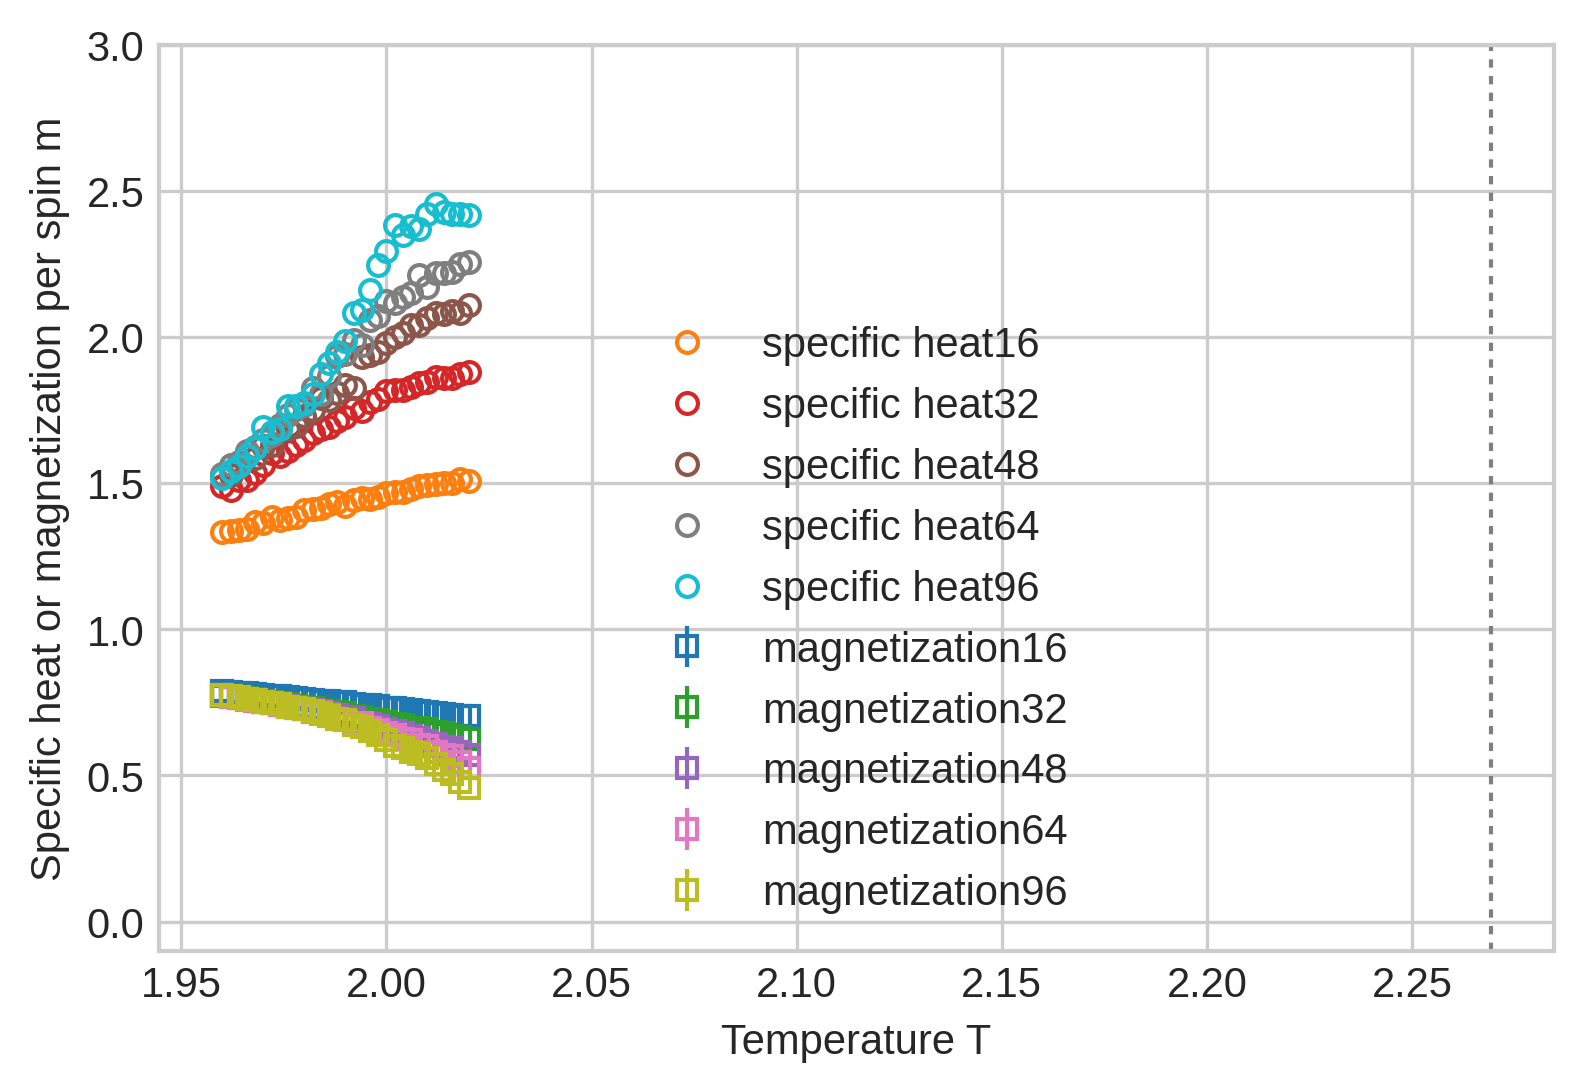

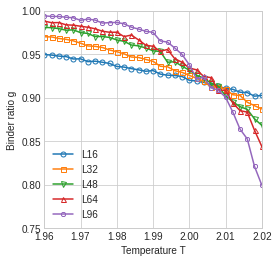

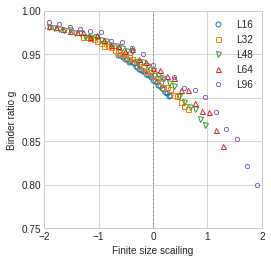

In [13]:
alpha = "2.500000"
alpha2 = 2.5
ls = []
for i, mcs in zip(Lsize, mcsl):
    ls.append("./0711/a="+str(alpha2)+"/AA_Metropolis_c_"+str(i)+"_"+str(i)+"_int31_mcs"+str(mcs)+"_a"+alpha+"_Test__1.csv")

draw_multi(ls,Lsize,mcsl)
# draw_binder(ls,Lsize,(1.8,2.23),(0.75,1))
draw_binder_FFS(ls,Lsize,(1.96,2.02),(0.75,1),2,1)

In [14]:
alpha = "3.000000"
alpha2 = 3
ls = []
for i, mcs in zip(Lsize, mcsl):
    ls.append("./0711/a="+str(alpha2)+"/AA_Metropolis_c_"+str(i)+"_"+str(i)+"_int31_mcs"+str(mcs)+"_a"+alpha+"_Test__1.csv")

draw_multi(ls,Lsize,mcsl)
# draw_binder(ls,Lsize,(1.8,2.23),(0.75,1))
draw_binder_FFS(ls,Lsize,(2.06,2.12),(0.75,1),2.08,1)

FileNotFoundError: [Errno 2] No such file or directory: './0705/a=3/AA_Metropolis_c_16_16_int31_mcs3000000_a3.000000_Test__1.csv'

<Figure size 1800x1200 with 0 Axes>

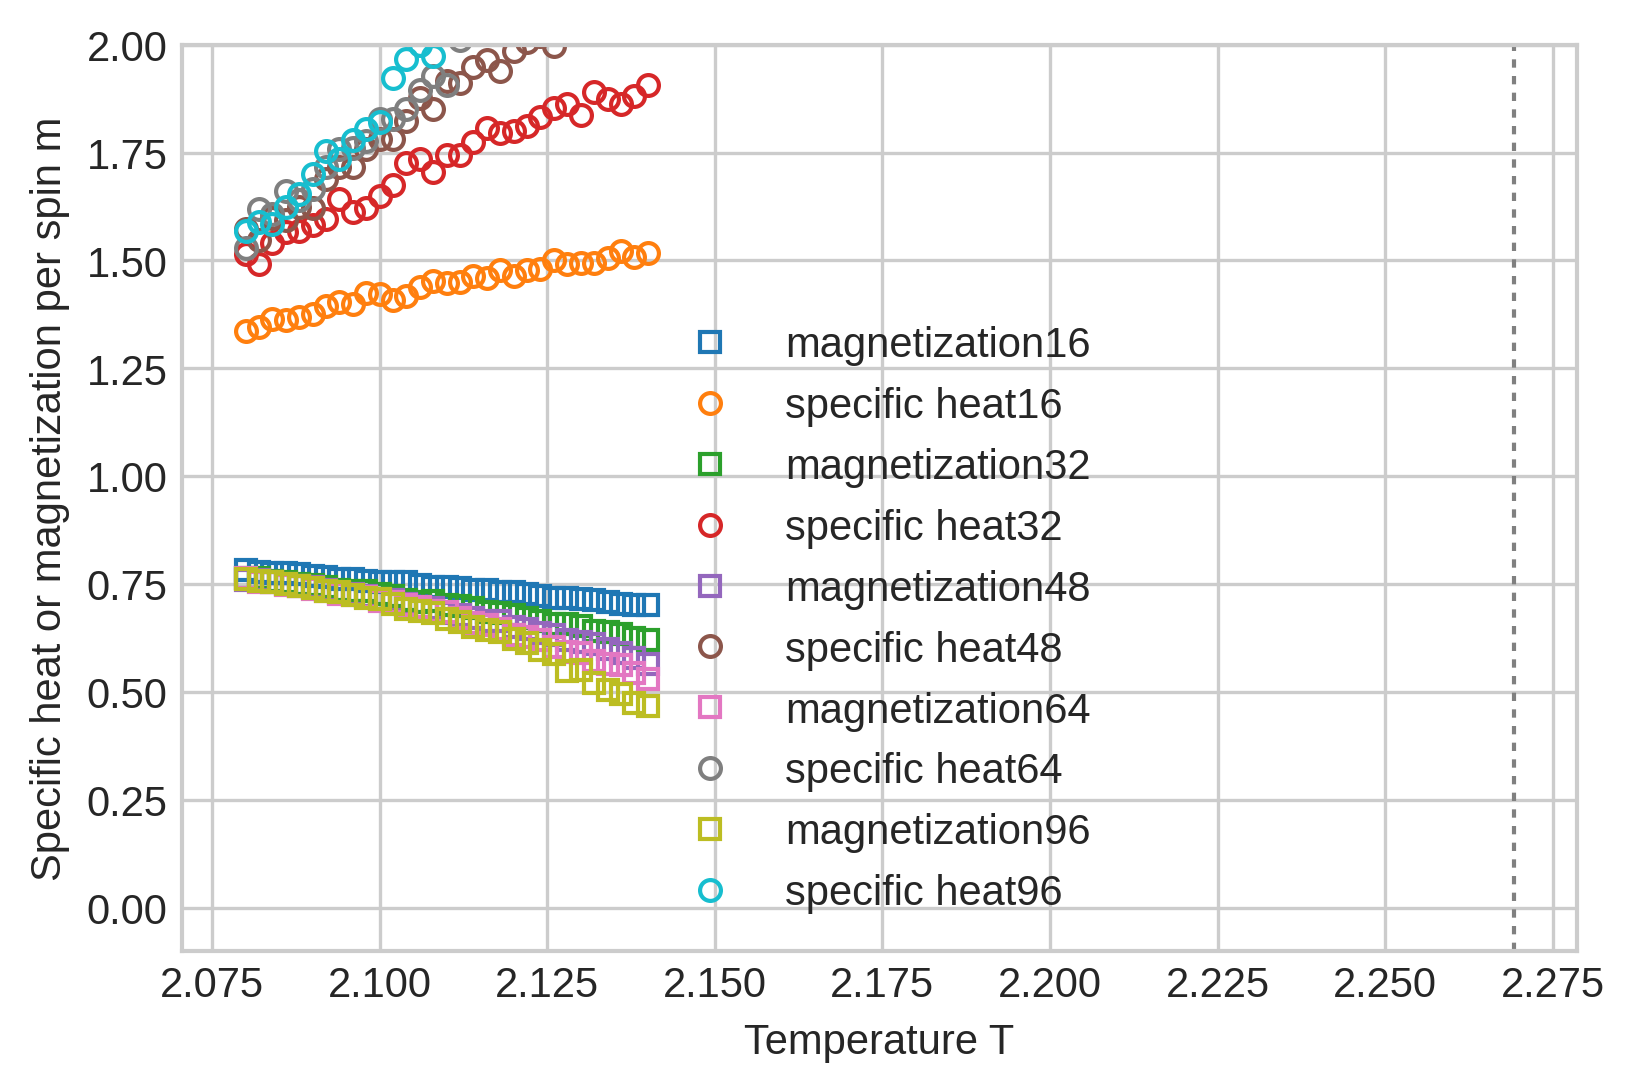

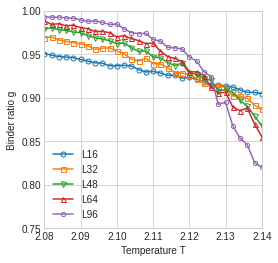

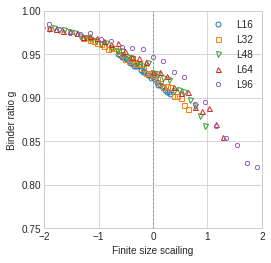

In [ ]:
alpha = "3.500000"
alpha2 = 3.5
ls = []
for i, mcs in zip(Lsize, mcsl):
    ls.append("./0711/a="+str(alpha2)+"/AA_Metropolis_c_"+str(i)+"_"+str(i)+"_int31_mcs"+str(mcs)+"_a"+alpha+"_Test__1.csv")

draw_multi(ls,Lsize)
# draw_binder(ls,Lsize,(1.8,2.23),(0.75,1))
draw_binder_FFS(ls,Lsize,(2.08,2.14),(0.75,1),2.12,1)

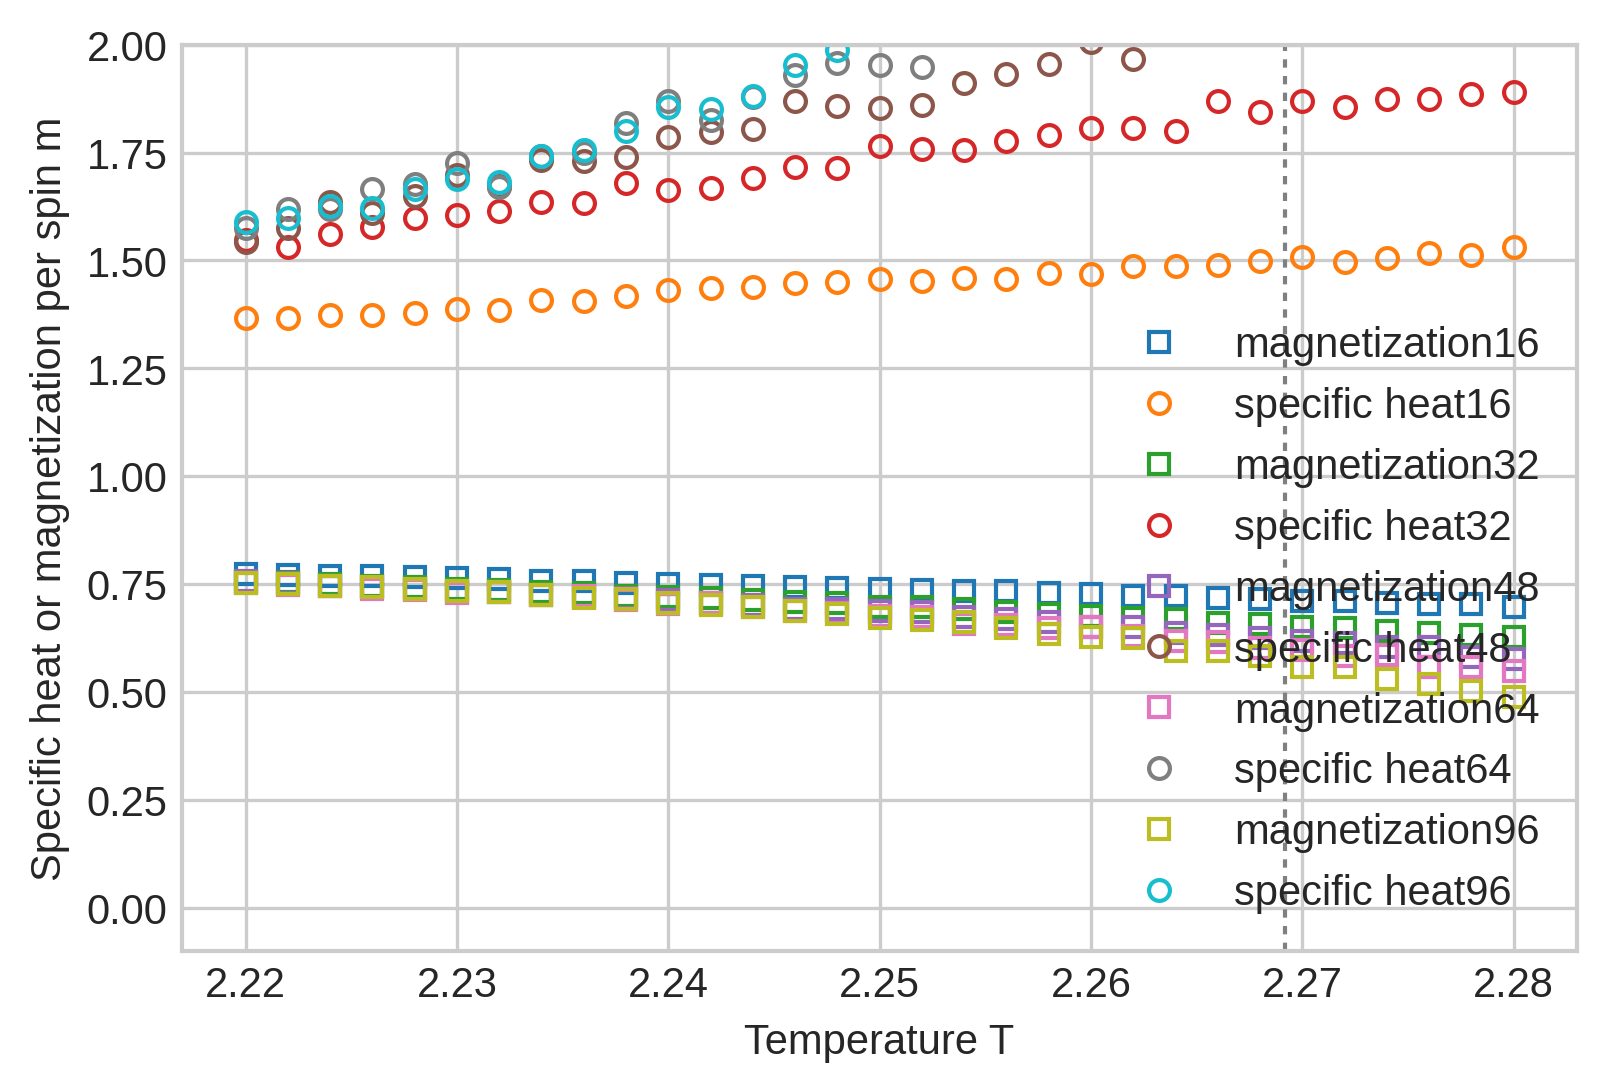

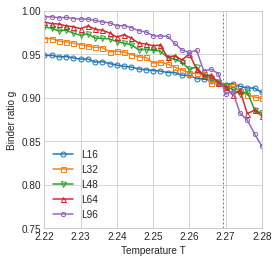

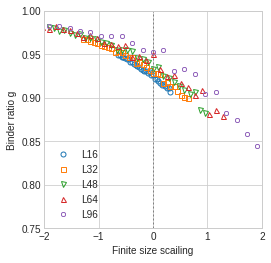

In [ ]:
alpha = "100.000000"
alpha2 = 100
ls = []
for i, mcs in zip(Lsize, mcsl):
    ls.append("./0711/a="+str(alpha2)+"/AA_Metropolis_c_"+str(i)+"_"+str(i)+"_int31_mcs"+str(mcs)+"_a"+alpha+"_Test__1.csv")

draw_multi(ls,Lsize)
# draw_binder(ls,Lsize,(1.8,2.23),(0.75,1))
draw_binder_FFS(ls,Lsize,(2.22,2.28),(0.75,1),2.26,1)

In [ ]:
Lsize = [16,32,48,64,96]
mcsl = [1000000,1000000,1000000,500000,500000]
alpha = "100.000000"
alpha2 = 100
ls = []
for i, mcs in zip(Lsize, mcsl):
    ls.append("./0711/alpha"+str(alpha2)+"/AA_Metropolis_c_"+str(i)+"_"+str(i)+"_int51_mcs"+str(mcs)+"_a"+alpha+"_Test__1.csv")

draw_multi_with_exact(ls,Lsize)
# draw_binder(ls,Lsize,(1.8,2.23),(0.75,1))
draw_binder_FFS(ls,Lsize,(2.22,2.28),(0.75,1),2.26,1)

NameError: name 'draw_multi_with_exact' is not defined

In [ ]:
def draw_1binder(path):
    L5 = pd.read_csv(path)
    # L5 = pd.read_csv("../C++/Result/Exact_c_5_int40_1.csv")
    Llist = [L5]
    T2 = L5.iloc[:,1].values
    Binder = [0.5*(3-i.iloc[:,6].values/(i.iloc[:,5].values)**2) for i in Llist]
    plt.style.use('seaborn-whitegrid')

    # plt.ylim(-0.1,2)
    plt.xlim(1.5,4)
    marker = ["o","s","o","s","o"]
    for i in range(1):
        plt.plot(T2,Binder[i],marker=marker[i],markersize=5)

    # plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])

    plt.show()

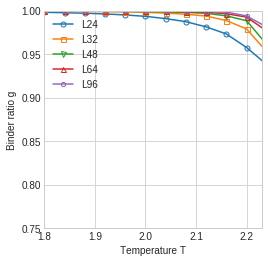

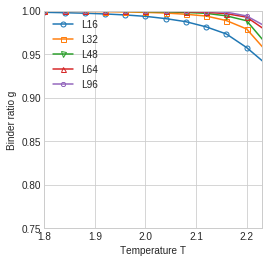

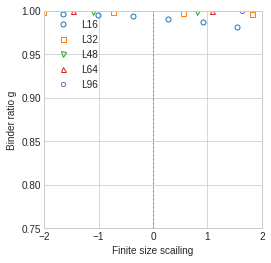

In [ ]:
Lsize = [16,32,48,64,96]
mcsl = [1000000,1000000,1000000,500000,500000]
alpha = "100.000000"
alpha2 = 100
ls = []
for i, mcs in zip(Lsize, mcsl):
    ls.append("./0702/alpha"+str(alpha2)+"/AA_Metropolis_c_"+str(i)+"_"+str(i)+"_int51_mcs"+str(mcs)+"_a"+alpha+"_Test__1.csv")

draw_binder(ls,Lsize,(1.8,2.23),(0.75,1))
draw_binder_FFS(ls,Lsize,(1.8,2.23),(0.75,1),2.023)

(1.0, 4.0)

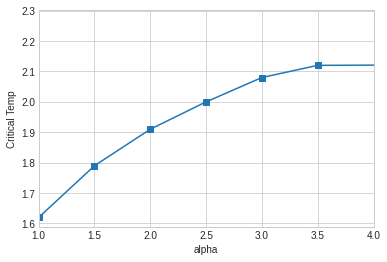

In [ ]:
alpha_l = [1,1.5,2,2.5,3,3.5,100]
critical_T = [1.62,1.79,1.91,2.0,2.08,2.12,2.27]
plt.plot(alpha_l,critical_T,"-s")
plt.xlabel("alpha")
plt.ylabel("Critical Temp")
plt.xlim(1,4)
